# 7PAM2021-0901-2024
# Machine Learning and Neural Networks

# Individual assignment: Machine learning tutorial

Student Name: Fathima Azeez

Student ID: 23032069

# Decision Tree Algorithm

In [70]:
# Import basic necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [71]:
# Load the iris dataset 
from sklearn.datasets import load_iris
iris=load_iris() 

# Loading the Iris dataset using the load_iris function from sklearn.datasets
iris = load_iris() 

# Extracting the feature matrix (X) and target vector (y) from the loaded dataset
X, y = iris.data, iris.target

# Extracting the class names (species names) from the dataset for use in later visualizations or reporting
class_names = iris.target_names 

# Displaying the entire Iris dataset object, which includes feature data, target labels, and additional information
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [72]:
# Create a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [73]:
# Printing the feature names of the Iris dataset, which correspond to the columns of the feature matrix
print("feature names:", iris.feature_names)

# Printing the shape of the Iris DataFrame ('iris_df')
print(iris_df.shape)

# Printing the first few rows of the DataFrame ('iris_df') to get a preview of the data
print(iris_df.head())

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [75]:
# Extracting the feature matrix (X) from the DataFrame by selecting all rows and the first 4 columns (0 to 3).
X = iris_df.values[:, 0:4] 

# Extracting the target labels (Y) from the Iris dataset. 
Y = iris.target 

# Printing the feature matrix 'X' to see the values of the features (sepal length, sepal width, etc.)
print(X) 

# Printing the target labels 'Y' to see the species labels for each flower sample.
print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [76]:
# Splitting dataset into training and testing 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100) 

In [77]:
# Initialize and train the decision tree model 
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion='gini', random_state=100)
dtc.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=100)

In [78]:
# Make predictions
X=[[6.4, 1.8, 6.6, 2.1]] 
Y_pred=dtc.predict(X)
print("Prediction for sample X:",Y_pred) 

Prediction for sample X: [2]


In [79]:
# Predict the labels for the test dataset using the trained Decision Tree model
Y_pred = dtc.predict(X_test)

# Print the predicted labels for the test dataset
print(Y_pred)

[2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 2 2 2 2 0 2 0 1 2 1 0 1 2 1 1 1 0 0 1 0
 1 2 2 0 1 2 2 0]


# Accuracy Score

In [80]:
# Evaluate the model
from sklearn.metrics import accuracy_score

print("accuracy:", metrics.accuracy_score(y_test, Y_pred)) 

accuracy: 0.9555555555555556


# Classification Report

In [81]:
# Importing the classification_report function from sklearn.metrics
from sklearn.metrics import classification_report

# Generating a classification report to evaluate the model's performance on the test set
print("\033[1mClassification Report:\033[0m\n", classification_report(y_test, Y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



# Confusion Matrix and Heatmap

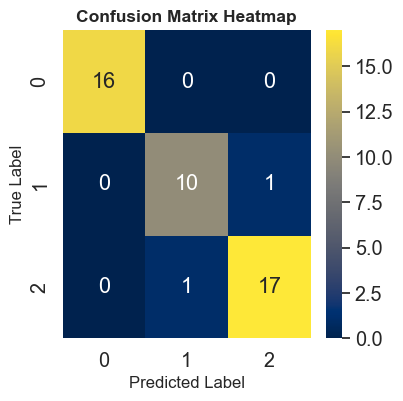

In [82]:
# Importing the confusion_matrix function from sklearn.metrics
from sklearn.metrics import confusion_matrix

# Generating the confusion matrix by comparing the true labels (y_test) and predicted labels (Y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, Y_pred)

# Converting the confusion matrix to a pandas DataFrame for better visualization
matrix = pd.DataFrame(confusion_matrix)

# Setting the plot's axes for the heatmap (optional, may not be needed as plt already handles it)
axis = plt.axes

# Setting the font scale for the seaborn heatmap to make it more readable
sns.set(font_scale=1.3)

# Creating a figure for the heatmap with specified size
plt.figure(figsize=(4, 4))

# Generating the heatmap to visualize the confusion matrix
sns.heatmap(matrix, annot=True, fmt='g', cmap='cividis')

# Adding a title to the heatmap with bold and larger font size
plt.title("Confusion Matrix Heatmap", fontsize=12.5, fontweight='bold')

# Labeling the x-axis as 'Predicted Label' with a larger font size
plt.xlabel("Predicted Label", fontsize=12)

# Labeling the y-axis as 'True Label' with a larger font size
plt.ylabel("True Label", fontsize=12)

# Displaying the heatmap
plt.show()

# Decision Tree Visualization

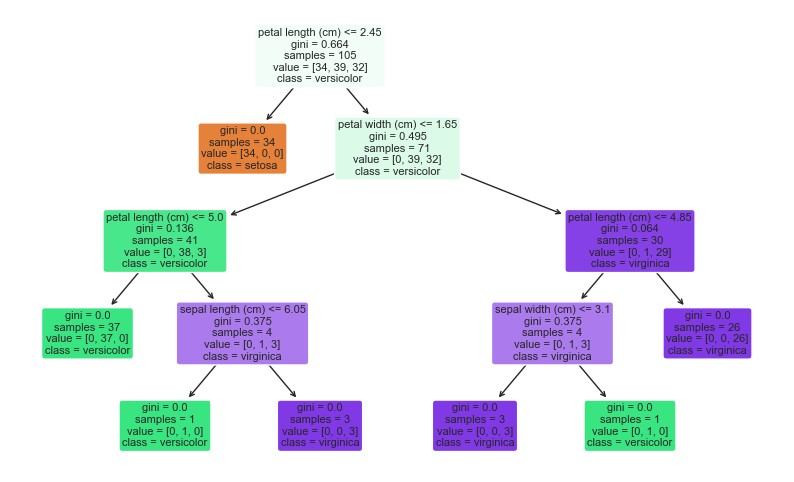

In [83]:
# Importing the tree module from sklearn to plot decision tree
from sklearn import tree

# Converting the Iris dataset target names (class labels) to a list for use in the plot
class_names = list(iris.target_names)

# Setting up the figure for the plot with a specified size (10x6 inches) and white background color
plt.figure(figsize=(10, 6), facecolor='white')

# Plotting the decision tree using the 'plot_tree' function
tree.plot_tree(dtc, rounded=True, feature_names=iris.feature_names, class_names=class_names, filled=True, fontsize=8)

# Displaying the plot
plt.show()

Decision Tree: Text Representation

In [84]:
# Exporting the decision tree model into a human-readable text format
text_representation = tree.export_text(dtc)

# Printing the text representation of the decision tree to the console
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2

